# Using Rejection Sampling

As mentioned in the write-up, we select proposal distribution $q(x) = \mathcal{N} (x |0, \sigma^2)$ to estimate the distribution $p(x) \propto exp(sin(x))$. For this, we select $\sigma^2 = (\frac{\pi}{3.25})^2$ and as derived in the write-up the constant $M$ can be expressed as $M = \sqrt{2 \pi \sigma^2} \exp(1) \exp(\frac{\pi^2}{2 \sigma^2})$.

In [4]:
import numpy as np
import math

Sigma_sqv = (math.pi/3.25)**2
M_v = math.sqrt(2 * math.pi * Sigma_sqv) * math.exp(1) * math.exp((math.pi**2)/(2 * Sigma_sqv))
print(M_v)

1294.9966959137473


In [5]:

Samples_found = 0
Samples_needed = 10000

Samples_list = []

while Samples_found < Samples_needed:
    qsample = np.random.normal(0,Sigma_sqv)
    qs_prob = 1/math.sqrt(2 * math.pi * Sigma_sqv) * math.exp(- qsample**2 / (2 * Sigma_sqv))
    #print(qsample, qs_prob)
    up_bound = M_v * qs_prob
    uval = np.random.uniform(low=0, high=up_bound)
    #print(uval)
    verif = math.exp(math.sin(qsample))
    #print(up_bound, uval, verif)
    if uval <= verif:
        Samples_list.append(qsample)
        Samples_found = Samples_found + 1
        if Samples_found%100 == 0:
            print('Sampled:', Samples_found)
print(Samples_list)

Sampled: 100
Sampled: 200
Sampled: 300
Sampled: 400
Sampled: 500
Sampled: 600
Sampled: 700
Sampled: 800
Sampled: 900
Sampled: 1000
Sampled: 1100
Sampled: 1200
Sampled: 1300
Sampled: 1400
Sampled: 1500
Sampled: 1600
Sampled: 1700
Sampled: 1800
Sampled: 1900
Sampled: 2000
Sampled: 2100
Sampled: 2200
Sampled: 2300
Sampled: 2400
Sampled: 2500
Sampled: 2600
Sampled: 2700
Sampled: 2800
Sampled: 2900
Sampled: 3000
Sampled: 3100
Sampled: 3200
Sampled: 3300
Sampled: 3400
Sampled: 3500
Sampled: 3600
Sampled: 3700
Sampled: 3800
Sampled: 3900
Sampled: 4000
Sampled: 4100
Sampled: 4200
Sampled: 4300
Sampled: 4400
Sampled: 4500
Sampled: 4600
Sampled: 4700
Sampled: 4800
Sampled: 4900
Sampled: 5000
Sampled: 5100
Sampled: 5200
Sampled: 5300
Sampled: 5400
Sampled: 5500
Sampled: 5600
Sampled: 5700
Sampled: 5800
Sampled: 5900
Sampled: 6000
Sampled: 6100
Sampled: 6200
Sampled: 6300
Sampled: 6400
Sampled: 6500
Sampled: 6600
Sampled: 6700
Sampled: 6800
Sampled: 6900
Sampled: 7000
Sampled: 7100
Sampled: 7200
S

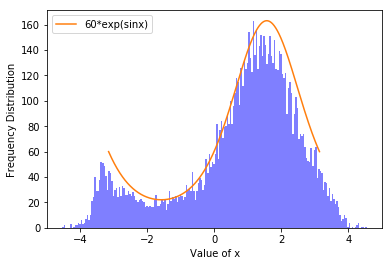

In [6]:
import matplotlib.pyplot as plt

num_bins = 200
n, bins, patches = plt.hist(Samples_list, num_bins, facecolor='blue', alpha=0.5)
x_datas = np.linspace(-math.pi,math.pi,1000)
#print(x_datas)
y_datas = 60*np.exp(np.sin(x_datas))
plt.plot(x_datas,y_datas,label='60*exp(sinx)')
plt.legend()
plt.xlabel('Value of x')
plt.ylabel('Frequency Distribution')
plt.show()